In [ ]:
!pip3 install numpy pandas scikit-learn seaborn matplotlib

Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You
may use a built-in package to implement your classifier. Try modifying one or more of the input
parameters and describe what changes you notice in your results. Clearly describe how these
factors are affecting your output.

0.9385964912280702


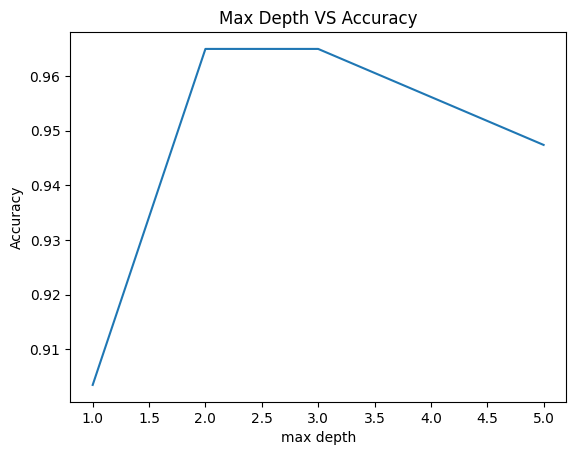

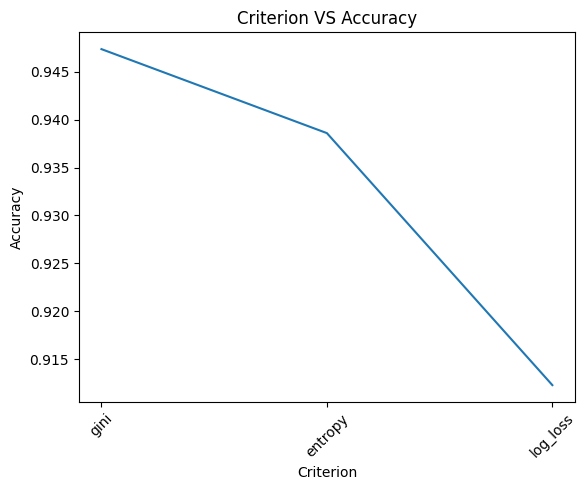

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# # Add intercept term
# X_train['intercept'] = 1
# X_test['intercept'] = 1

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))

scores = []
for i in range(1, 6):
  clf3 = DecisionTreeClassifier(max_depth=i)
  clf3.fit(X_train, y_train)
  scores.append(clf3.score(X_test, y_test))

plt.figure()
plt.plot(np.arange(1, 6), np.array(scores))
plt.xlabel("max depth")
plt.ylabel("Accuracy")
plt.title("Max Depth VS Accuracy")
plt.show()

scores = []
names = ['gini', 'entropy', 'log_loss']
for i in names:
  clf2 = DecisionTreeClassifier(criterion=i)
  clf2.fit(X_train, y_train)
  scores.append(clf2.score(X_test, y_test))

plt.figure()
plt.plot(names, np.array(scores))
plt.xticks(rotation=45)
plt.xlabel("Criterion")
plt.ylabel("Accuracy")
plt.title("Criterion VS Accuracy")
plt.show()





I have tested on two parameters: max depth and criterion.

For max depth, there is an accuracy increasing from max depth = 1 to max depth = 2. The accuracy remains the same for max_depth = 2 and max_depth = 3, and then the accuracy decreases while the max_depth increases.

For criterion, it seems like gini performs the best, while entropy and log_loss are slighly worse than gini, and log_loss is slightly worse than entropy.

Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data. Use k-fold cross
validation to find the effectiveness of both the models. Comment on the difference/similarity of
the results.

In [4]:
from numpy import mean
from numpy import std

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb

# Modified from the given notebook in class

# define the model
bag = BaggingClassifier(n_estimators=10)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(bag, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Bagging Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('XGB Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))





Bagging Accuracy: 0.950 (0.025)
XGB Accuracy: 0.967 (0.024)


Given the k fold implemented for both bagging and XG boosting, they both perform pretty well. The standard deviation is small, which means both method are stable. XG boosting performs slightly better than bagging, no matter on the mean accuracy or the standard deviation. I think this shows that XG boosting performs better on bagging, at least on this dataset.

Task 3 (40 points): Compare the effectiveness of the three models implemented above. Clearly
describe the metric you are using for comparison. Describe (with examples) Why is this
metric(metrics) suited/appropriate for the problem at hand? How would a choice of a different
metric impact your results? Can you demonstrate that?

In [22]:
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# the default traditional tree classifier
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree.score(X_test, y_test)

# bagging classifier
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag.score(X_test, y_test)

# XG boosting
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

print("============Accuracy Metric==============")
print("Accuracy of traditional tree classifier: ", tree.score(X_test, y_test))
print("Accuracy of bagging classifier: ", bag.score(X_test, y_test))
print("Accuracy of XG boosting classifier: ", xgb.score(X_test, y_test))

print("============Precision Metric==============")
print("Precision of traditional tree classifier: ", precision_score(tree_pred, y_test))
print("Precision of bagging classifier: ",  precision_score(bag_pred, y_test))
print("Preicison of XG boosting classifier: ",  precision_score(xgb_pred, y_test))

print("============Recall Metric==============")
print("Recall of traditional tree classifier: ", recall_score(tree_pred, y_test))
print("Recall of bagging classifier: ",  recall_score(bag_pred, y_test))
print("Recall of XG boosting classifier: ",  precision_score(xgb_pred, y_test))

============Accuracy Metric==============
Accuracy of traditional tree classifier:  0.9473684210526315
Accuracy of bagging classifier:  0.9649122807017544
Accuracy of XG boosting classifier:  0.9912280701754386
============Precision Metric==============
Precision of traditional tree classifier:  0.9324324324324325
Precision of bagging classifier:  0.9459459459459459
Preicison of XG boosting classifier:  0.9864864864864865
============Recall Metric==============
Recall of traditional tree classifier:  0.9857142857142858
Recall of bagging classifier:  1.0
Recall of XG boosting classifier:  0.9864864864864865


According to the performance above, all three classifiers are effective. For accuracy, precision and recall, they all maintain above 90%, which is essentially good performance.

Here, I am using three metrics: accuracy, precision and recall. Why these three metrics?

Accuracy measures the proportion of all predictions (both positive and negative) that the model got right.

Precision measures the proportion of positive identifications that were actually correct.

Recall measures the proportion of actual positives that were correctly identified.

These metrics are suited for comparing the models because they each offer insight into different aspects of the model's predictive capabilities:

Accuracy is useful for overall performance but doesn't give insight into the balance between false positives and false negatives.
Precision is important when the cost of a false positive is high.
Recall is crucial when it's important not to miss any positive cases.

In the above case, for each metric:
### Accuracy
XG boosting has the best accuracy, follows by bagging, and finally traditional tree classifier.
### Precision:
same with accuracy, XG boosting has the best precision, follows by bagging and finally traditional tree classifier.
### Recall
bagging has the best accuracy, follows by XG boosting, and then closely catched by traditional tree classifier.

Here, if we focus on precision, where we want to make sure the positive identifications that are actually correct, then XG boosting is the best. However, if we focus on recall, where we do not want to miss a positive case, bagging classifier is the one performs better at recall, and we want to use bagging classifier instead of XG boosting.

The following task is for Graduate level only (6000 level): This task is more open ended and
emphasizes the research aspect of implementing a model. You will be exploring the impact of
hyperparameter tuning which we haven’t discussed in detail so far.


**Task (50 points):** For the same classification problem solved above, implement the XGBoost
algorithm. If you picked XGBoost as one of the boosting algorithms in task 2, you may use the
same implementation. Picking the best hyper-parameters is an important task for any Machine
Learning implementation. In this task create an experiment that explores the impact of any 3
input parameters on your result. Describe the parameters in detail. Also describe how you
compare the results.
An experiment can be defined as a systematic way of picking parameter values. This could be
something that you come up with yourself or you may refer to the exiting literature on design
of experiments for hyperparameter tuning. See:
https://www.jeremyjordan.me/hyperparameter-tuning/
This task will require you to perform some research into this open-source library yourself. A
good place to start is here: https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2]
}

xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("best parameters: ", best_params),
print("best accuracy: ", best_score)
print("test accuracy: ", test_accuracy)


best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
best accuracy:  0.9736263736263737
test accuracy:  0.9736842105263158


For the hyper parameter search, I am choosing three important hyper parameter:

max_depth controls the maximum depth of a tree. Deeper trees can model more complex relationships by creating more specific rules, but they also risk overfitting.

n_estimators is the number of trees in the forest. More trees can lead to a more robust model by reducing variance. However, adding too many trees can slow down the training process and, beyond a certain point, will not improve the model significantly.

learning_rate  scales the contribution of each tree. If it's too high, the model can converge too quickly to a suboptimal solution, while too low a value can lead to a long training process that might not converge in a reasonable time frame.

There three hyper parameters are extremely important in terms of XG boosting classifier. For each parameter, I decide to explore 5 values of each param, resulting into a 125 combination of hyper params, which I think is comprehensive enough to find a set of parameters that is close to the optimal solution.

For max_depth, because by question 1, the performance degrades on the traditional tree classifier after max_depth >= 3, so I choose 2 to 6 as a reasonable span.

For n_estimator, I guess 300 is a good value for such hyperparameter, so I decide to explore more around this value.

For learning rate, I don't have a good sense, so I include both small value and large value of learning rate.

It turns out my initial guess is kind of off, where max_depth = 2, learning_rate = 0.2 and n_estimators = 500 has the best performance, where the test accuracy is pretty high as 97.36%.